# Chapter 7 - Moving Beyond Linearity

#### Student ID:

#### Name:  

部分習題需要寫數學式。

若不想用打的，可用手寫後，進行拍照或掃描，並使用以下指令引入圖片。

請確認圖片清晰程度為可辨識。

`![title](test.png)`

### *For Q1(a), Q2(a) and Q2(b), replace the "?" with the ture answer.*
### *Note that you can only modify code that have been underlined for coding problem*
### *except for loading data.*
### *Answer the problem inside the block with "Ans:" for the conceptual problem.*

### Q1: Polynomial Regression.

(a) Write the polynomial regression model $y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + ... + \beta_mx_i^m + \epsilon_i\;(i=1,2,...,n)$ in matrix form.

> Ans:  
$$
\begin{pmatrix}
y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n
\end{pmatrix} = 
\begin{pmatrix}
1 & x_1 & x_1^2 & \dots & x_1^m \\
1 & x_2 & x_2^2 & \dots & x_2^m \\
1 & x_3 & x_3^2 & \dots & x_3^m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^m \\
\end{pmatrix}
\begin{pmatrix}
\beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_m
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
\end{pmatrix}
$$

(b) The matrix expression in (a) can be written as $Y = X\mathbf{\beta} + \mathbf{\epsilon}$. What is the vector of estimated polynomial regression coefficients ($\hat{\beta}$) using ordinary least squares estimation?  
Write the answer in terms of $Y$ and $X$.

> Ans:  
$\hat{\beta}=(X^TX)^{-1}X^T\hat{y}$

Answer the following two questions using the variables `dis` (the weighted mean of distances to five Boston employment centers) and `nox` (nitrogen oxides concentration in parts per 10 million) from the `Boston` data. We will treat
`dis` as the predictor and `nox` as the response.

In [3]:
# If you're using colab, run this block.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')
Boston = pd.read_csv(r"C:\Users\user\Desktop\Data\Boston.csv", index_col=0)
dis = Boston.pop('dis')
nox = Boston.pop('nox')

# list.pop([index=-1])
# 可选参数，要移除列表元素的索引值，不能超过列表总长度，默认为 index=-1，删除最后一个列表值
# 该方法返回从列表中移除的元素对象

Boston

,crim,zn,indus,chas,rm,age,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,6.575,65.2,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,6.421,78.9,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,7.185,61.1,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,6.998,45.8,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,7.147,54.2,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,6.593,69.1,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,6.120,76.7,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,6.976,91.0,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,6.794,89.3,1,273,21.0,6.48,22.0


In [5]:
dis

1      4.0900
2      4.9671
3      4.9671
4      6.0622
5      6.0622
        ...  
502    2.4786
503    2.2875
504    2.1675
505    2.3889
506    2.5050
Name: dis, Length: 506, dtype: float64

```python
# If you're using Jupyter, run this block.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Boston = pd.read_csv('Boston.csv', index_col=0)
dis = Boston.pop('dis')
nox = Boston.pop('nox')

# FileNotFoundError: [Errno 2] No such file or directory: 'Boston.csv'
```

(c) Plot the polynomial fits using `sns.regplot` function (set `ax=ax` and `scatter=False`) with polynomial degrees (`order=n`) from 1 to 9, and report the associated residual sum of squares using `sm.OLS` and the `PolynomialFeatures` function.

Degree 1 : 2.768562858969276
Degree 2 : 2.0352618689352564
Degree 3 : 1.9341067071790703
Degree 4 : 1.9329813272985943
Degree 5 : 1.9152899610843042
Degree 6 : 1.8782572985081671
Degree 7 : 1.8494836145829998
Degree 8 : 1.8356296890678114
Degree 9 : 1.833330804500842


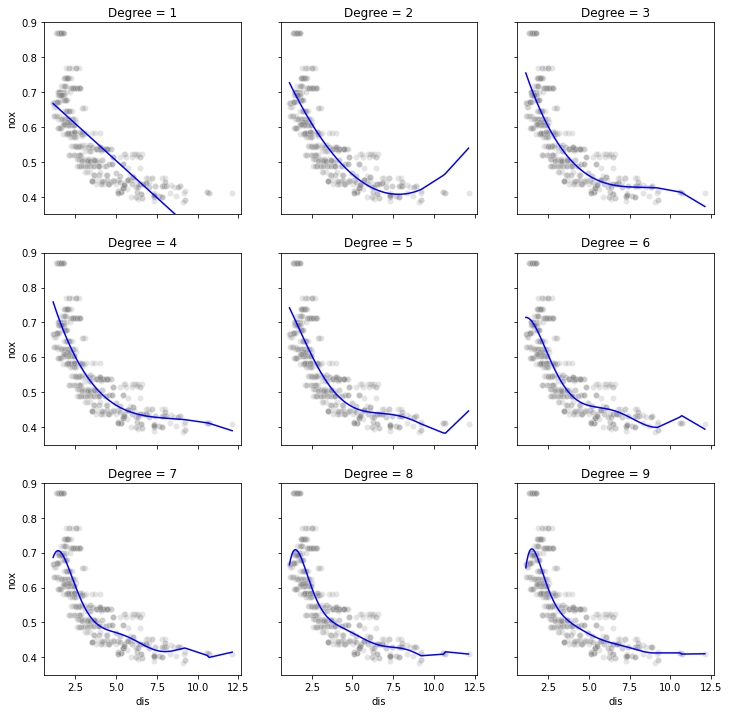

In [19]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,12))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2,ax=ax)
        # __________plot__________
        poly = PolynomialFeatures(n)
        X = poly.fit_transform(dis.to_frame())
        y = nox
        # X.shape   # (506, 10)???

        model = sm.OLS(y,X).fit()
        
        ax.set(title = 'Degree = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        # _______________________________
        y_hat = model.predict(X)
        sns.lineplot(x=X[:, 1], y=y_hat, ax=ax, color='blue')
        
        # __________ssr__________
        ssr = model.ssr
        
        print('Degree', n, ':', ssr)

(d) Perform cross-validation or another approach to select the optimal
degree for the polynomial.
Describe your results.

Text(0, 0.5, '10-CV error')

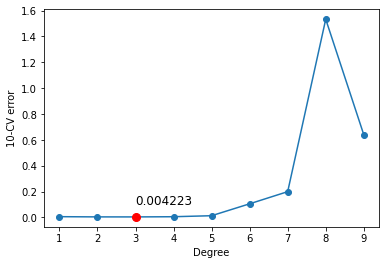

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

scores = []
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1,10):
    
    # _______________________________
    poly = PolynomialFeatures(degree = n)
    X = poly.fit_transform(dis.to_frame())
    y = nox
    
    lin_reg = LinearRegression()
    
    # __________mse__________    
    mse = (-np.mean(cross_val_score(lin_reg,X,y,scoring = 'neg_mean_squared_error',cv = 10)))
    
    scores.append(mse)
    
plt.plot(range(1,10), scores, marker = 'o')
plt.plot(scores.index(min(scores))+1, min(scores), marker = 'o', markersize = 8, color = 'r')
ax.text(scores.index(min(scores))+1, min(scores)+0.1, round(min(scores), 6), size=12)
plt.xlabel('Degree')
plt.ylabel('10-CV error')

> Ans:  當 Degree = 3 的時候 CV 的 MSE 最小，而在 Degree > 4 之後 MSE 有顯著的提升，這是因為模型產生了 overfitting。

### Q2: Regression Splines.

A cubic regression spline with one knot at $\xi$ can be obtained using a basis of the form $x$, $x^2$, $x^3$, $(x − \xi)_+^3$, where $(x − \xi)_+^3 = (x − \xi)^3$ if $x > \xi$ and equals 0 otherwise. We will now show that a function of the form
$$f(x)=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4 (x − \xi)_+^3$$
is indeed a cubic regression spline, regardless of the values of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

(a) Find a cubic polynomial
$$f_1(x)=a_1+b_1x+c_1x^2+d_1x^3$$
such that $f(x)=f_1(x)$ for all $x\leq \xi$. Express $a_1$, $b_1$, $c_1$, $d_1$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

> Ans:  
For $x\leq \xi$, we have $(x − \xi)_+^3 = 0$.  
Hence<br>
$$(a_1, b_1, c_1, d_1)=(\beta_0, \beta_1, \beta_2, \beta_3)$$

(b) Find a cubic polynomial
$$f_2(x)=a_2+b_2x+c_2x^2+d_2x^3$$
such that $f(x)=f_2(x)$ for all $x> \xi$. Express $a_2$, $b_2$, $c_2$, $d_2$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$. We have now establised (確定) that $f(x)$ is a piecewise (分段) polynomial.

> Ans:  
For $x \gt \xi$, we have $(x − \xi)_+^3 = (x − \xi)^3 $.  
Hence
$$f(x)=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3 + \beta_4 (x − \xi)^3 = (\beta_0 - \xi^3 \beta_4) + (\beta_1 + 3 \xi^2 \beta_4) x + (\beta_2 - 3 \xi \beta_4) x^2 + (\beta_3 + \beta_4) x^3 $$
Thus we take  
$(a_2, b_2, c_2, d_2)=(\beta_0 - \xi^3 \beta_4, \beta_1 + 3 \xi^2 \beta_4, \beta_2 - 3 \xi \beta_4, \beta_3 + \beta_4)$

(c) Show that $f_1(\xi) = f_2(\xi)$. That is, $f(x)$ is continuous at $\xi$.

> Ans:  
$$\begin{align}
f_1(x)&=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3 \\
f_2(x)&=(\beta_0 - \xi^3 \beta_4) + (\beta_1 + 3 \xi^2 \beta_4) x + (\beta_2 - 3 \xi \beta_4) x^2 + (\beta_3 + \beta_4) x^3
\end{align}$$

>$$\begin{align}
f_1(\xi)&=\beta_0+\beta_1\xi+\beta_2\xi^2+\beta_3\xi^3 \\
f_2(\xi)&=(\beta_0 - \xi^3 \beta_4) + (\beta_1 + 3 \xi^2 \beta_4) \xi + (\beta_2 - 3 \xi \beta_4) \xi^2 + (\beta_3 + \beta_4) \xi^3 \\
&= \beta_0+\beta_1\xi+\beta_2\xi^2+\beta_3\xi^3 \\
&= f_1(\xi)
\end{align}$$

(d) Show that $f'_1(\xi) = f'_2(\xi)$. That is, $f'(x)$ is continuous at $\xi$.

> Ans:  
$$\begin{align}
f_1'(x)&=\beta_1+2 \beta_2x+3 \beta_3x^2 \\
f_2'(x)&=(\beta_1 + 3 \xi^2 \beta_4) + 2 (\beta_2 - 3 \xi \beta_4) x + 3 (\beta_3 + \beta_4) x^2
\end{align}$$

>$$\begin{align}
f_1'(\xi)&=\beta_1+2 \beta_2\xi+3 \beta_3\xi^2 \\
f_2'(\xi)&=(\beta_1 + 3 \xi^2 \beta_4) + 2 (\beta_2 - 3 \xi \beta_4) \xi + 3 (\beta_3 + \beta_4) \xi^2 \\
&= \beta_1+2 \beta_2\xi+3 \beta_3\xi^2 \\
&= f_1'(\xi)
\end{align}$$

(e) Show that $f''_1(\xi) = f''_2(\xi)$. That is, $f''(x)$ is continuous at $\xi$.

> Ans:  
$$\begin{align}
f_1''(x)&=2 \beta_2+6 \beta_3x \\
f_2''(x)&=2 (\beta_2 - 3 \xi \beta_4) + 6 (\beta_3 + \beta_4) x
\end{align}$$

>$$\begin{align}
f_1''(\xi)&=2 \beta_2+6 \beta_3\xi \\
f_2''(\xi)&=2 (\beta_2 - 3 \xi \beta_4) + 6 (\beta_3 + \beta_4) \xi \\
&= 2 \beta_2+6 \beta_3\xi \\
&= f_1''(\xi)
\end{align}$$

(f) Use the `dmatix` to transform the `x` and fit a regression spline to predict `nox` using `dis` for a range of degrees of freedom. Plot the resulting fits and report the resulting RSS.

Degree of freedom = 3 : 1.9341067071790705
Degree of freedom = 4 : 1.922774992811925
Degree of freedom = 5 : 1.8401728014885232
Degree of freedom = 6 : 1.8339659031602094
Degree of freedom = 7 : 1.8298844459232841
Degree of freedom = 8 : 1.8169950567252338
Degree of freedom = 9 : 1.8256525103870564
Degree of freedom = 10 : 1.7925348895561337
Degree of freedom = 11 : 1.7969918217314278


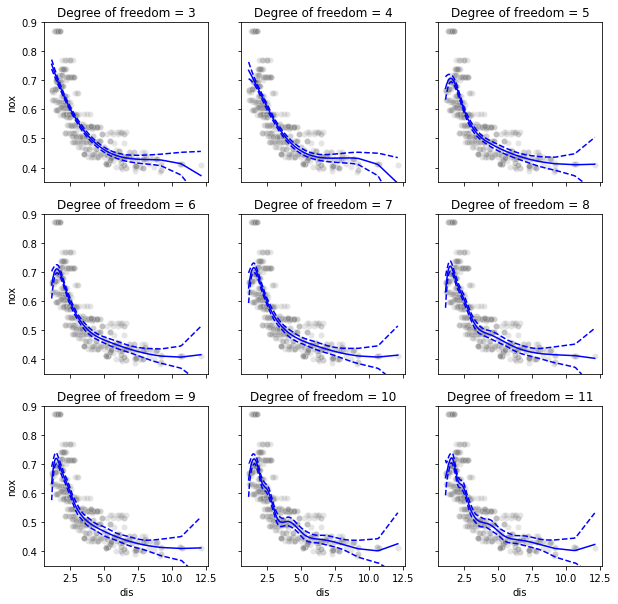

In [34]:
import statsmodels.api as sm
from patsy import dmatrix

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 3+j+3*i
        # _____________________________________________
        
        # __________dmatrix__________
        
        X = dis.to_frame()
        transformed_x = dmatrix('bs(DIS,df={})'.format(n),data = {'DIS':X},return_type = 'dataframe')
        
        result = sm.OLS(nox, transformed_x).fit()
        y_hat = result.predict(transformed_x)
        predictions = result.get_prediction()
        df_predictions = predictions.summary_frame()
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax,)
        sns.lineplot(x=dis, y=y_hat, color='blue', ax=ax)
        sns.lineplot(x=dis, y=df_predictions.mean_ci_lower, color='blue', linestyle='--', ax=ax)
        sns.lineplot(x=dis, y=df_predictions.mean_ci_upper, color='blue', linestyle='--', ax=ax)
        ax.set(title = 'Degree of freedom = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        print('Degree of freedom =', n, ':', result.ssr)

(g) Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.

Text(0, 0.5, '10-CV error')

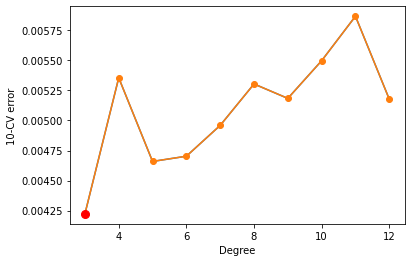

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from patsy import dmatrix

from sklearn.metrics import make_scorer,mean_squared_error

scores=[]
for n in range(3,13):
    # _____________________________________________
    transformed_x = transformed_x = dmatrix('bs(DIS,df={})'.format(n),data = {'DIS':X},return_type = 'dataframe') # __________dmatrix__________
    
    lm = LinearRegression()
    scores.append(cross_val_score(lm, transformed_x, nox, cv=10, scoring=make_scorer(mean_squared_error)).mean())
sns.lineplot(x=range(3,13), y=scores)

plt.plot(range(3,13), scores, marker = 'o')
plt.plot(scores.index(min(scores))+3, min(scores), marker = 'o', markersize = 8, color = 'r')
ax.text(scores.index(min(scores))+3, min(scores)+0.1, round(min(scores), 6), size=12)
plt.xlabel('Degree')
plt.ylabel('10-CV error')

In [47]:
min(scores)

0.004222893611150249

> Ans:  The best value of df is 3


### Q3: Local regression.

Use the `sm.nonparametric.lowess` function to fit a locally weighted scatterplot smoothing and predict `nox` using `dis` with fraction (`frac`) from `1/10` to `10/10`. Plot the resulting fits and report the resulting RSS.

In [50]:
dis

1      4.0900
2      4.9671
3      4.9671
4      6.0622
5      6.0622
        ...  
502    2.4786
503    2.2875
504    2.1675
505    2.3889
506    2.5050
Name: dis, Length: 506, dtype: float64

Degree of freedom = 1 : 2.0341294608260405
Degree of freedom = 2 : 2.0141978714404143
Degree of freedom = 3 : 2.0226967159529736
Degree of freedom = 4 : 2.0380150003129116
Degree of freedom = 5 : 2.044712851198746
Degree of freedom = 6 : 2.040425063193809
Degree of freedom = 7 : 2.039731000468079
Degree of freedom = 8 : 2.083215226377492
Degree of freedom = 9 : 2.169492566676033


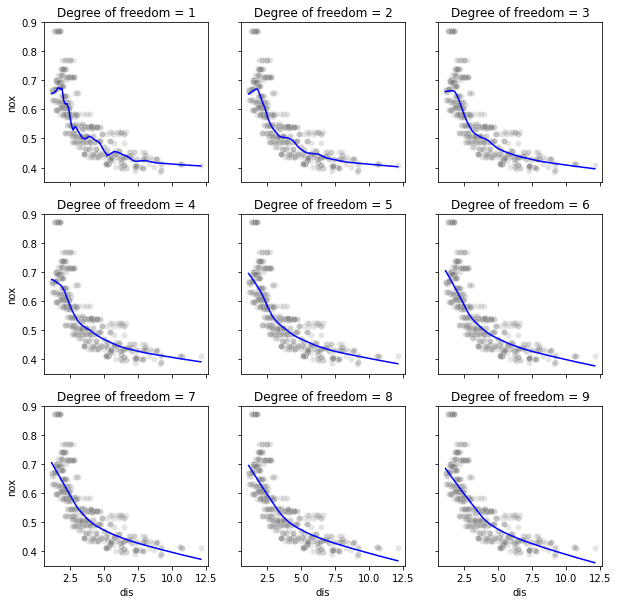

In [54]:
import statsmodels.api as sm

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        # _________________________________
        lowess = sm.nonparametric.lowess
        
        # _________lowess_________
        y_hat = lowess(y, dis, return_sorted=False, frac=n/10)  # X = dis (要求 vector)
        
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax,)
        sns.lineplot(x=dis, y=y_hat, color='blue', ax=ax)
        ax.set(title = 'Degree of freedom = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        print('Degree of freedom =', n, ':', sum((nox-y_hat)**2))

### Q4: Smoothing function.

Suppose that a curve $\hat{g}$ is computed to smoothly fit a set of n points
using the following formula:
$$\hat{g}=\text{arg min}_g\left(\sum_{i=1}^n (y_i-g(x_i))^2+\lambda \int \left[g^{(m)}(x)\right]^2\ dx\right),$$
where $g^{(m)}$ represents the $m$th derivative of $g$ (and $g^{(0)} = g$). Provide example sketches of $\hat{g}$ in each of the following scenarios.

(Following blocks give out an univariate example for $x$ and $y$, since this problem is kind of abstract. For answering following question, consider the function $g$ to be a polynomial function will make the problem easier, and the polynomial function can be implement by `np.polyval` and `np.polyfit`. 也就是說，這題有點抽象。如果不附上實際資料，就算回答出這題也不知道題幹再問啥觀念。所以這題附上點和底下的那些畫圖的 block 來讓大家比較好知道這題在搞啥。)

<AxesSubplot:>

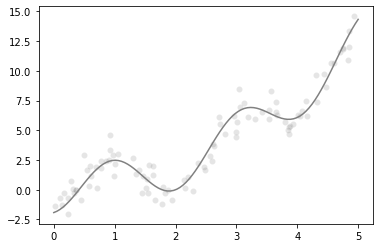

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
line = np.linspace(0,5,100)
X = np.random.uniform(0,5,size=100)
eps = np.random.normal(0,1,100)
g = lambda x: 2*np.sin(3*x+5)+0.5*x**2
Y = g(X)+eps
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')

(example) $\lambda=\infty,\ m =0$

> Ans:  
If we expect $\hat{g}$ to reach minimum under $\lambda=\infty$, $g^0(x)$ would be constrained to 0.  
Therefore, $\hat{g}(x)=0$.

In [56]:
g_hat = np.zeros_like(line)

<AxesSubplot:>

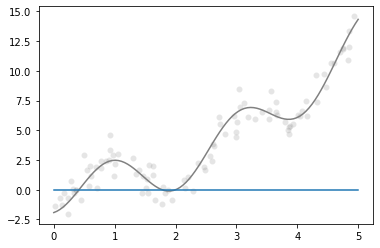

In [57]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

---

In [ ]:
# __________You_can_use_whatever_package_you_need__________

(a) $\lambda=\infty,\ m =1$

> Ans: $\hat{g}(x) = a , (constant)$  
Since $\lambda=\infty$ forces $g^{(1)}(x) \rightarrow 0$.

In [76]:
# _________________________________
reg = np.polyfit(X,Y,0)

# _________g_hat_________
g_hat = np.polyval(reg,X)

<AxesSubplot:>

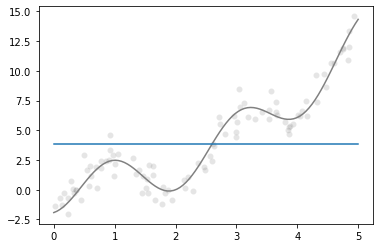

In [77]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(b) $\lambda=\infty,\ m =2$

> Ans: $\hat{g}(x) = ax + b$  
Since $\lambda=\infty$ forces $g^{(2)}(x) \rightarrow 0$.

In [99]:
# _________________________________
reg = np.polyfit(X,Y,1)

# _________g_hat_________
g_hat = np.polyval(reg,X)

In [100]:
reg

array([ 2.25849073, -1.43903471])

<AxesSubplot:>

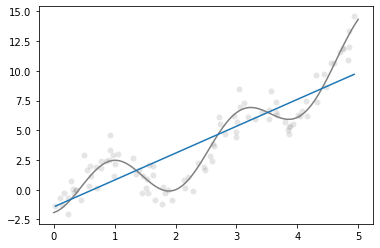

In [103]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=X, y=g_hat)

(c) $\lambda=\infty,\ m =3$

> Ans: $\hat{g}(x) = ax^2 + bx + c$  
Since $\lambda=\infty$ forces $g^{(3)}(x) \rightarrow 0$.

In [104]:
# _________________________________
reg = np.polyfit(X,Y,2)

# _________g_hat_________
g_hat = np.polyval(reg,X)

In [106]:
reg 

array([ 0.54787974, -0.40808518,  0.60177368])

<AxesSubplot:>

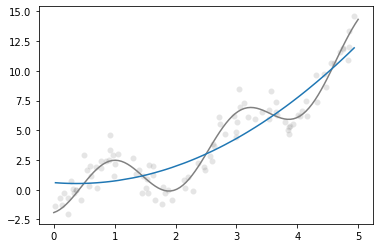

In [107]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=X, y=g_hat)

(d) $\lambda=0,\ m =3$

> Ans: $\hat{g}(x) =$ interpolating spline  
Since $\lambda=0$ means no penalty term.

In [112]:
# _________________________________
reg = np.polyfit(X,Y,10)  
# 為了創造過擬和隨便設的

# _________g_hat_________
g_hat = np.polyval(reg,X)

<AxesSubplot:>

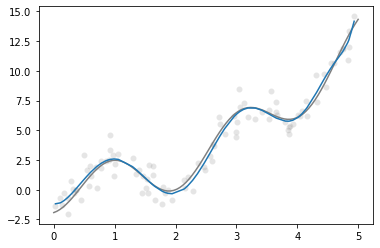

In [113]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=X, y=g_hat)

(e) Which of the parameter control the flexibility, $\lambda$ or $m$? Which of the parameter control the smoothness, $\lambda$ or $m$?

> Ans:  
control the flexibility:  $\lambda$<br>
control the smoothness:  $m$

題目到此

---

